### PEC2: CÓDIGO ANÁLISIS EXPLORATORIO DE LOS DATOS
#### TÍTULO: Los refugiados en los acuerdos de paz | MARIO MARTÍNEZ GARCÍA

#### 1. Cargamos los datos

In [2]:
#Paquetes necesarios
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.style.use('fivethirtyeight')
%matplotlib inline

In [1]:
#Realizamos un data head
import pandas as pd
import numpy as np

df = pd.read_csv('pax_data_476_agreements_18-04-20.csv')
df.head()

,Con,Contp,PP,PPName,Reg,AgtId,Agt,Dat,Status,Lgt,...,TjRep,TjRSym,TjRMa,TjNR,ImUN,ImOth,ImRef,ImPK,ImE,ImSrc
0,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,1739,Agreement between the Islamic Republic of Afgh...,2016-09-22,Multiparty signed/agreed,4,...,0,0,0,0,0,0,0,0,1,1
1,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,864,Tokyo Declaration Partnership for Self-Relianc...,2012-07-08,Multiparty signed/agreed,14,...,0,0,0,1,0,0,0,0,1,1
2,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,848,Conclusions of the Conference on Afghanistan a...,2011-12-05,Multiparty signed/agreed,7,...,0,0,0,1,1,0,0,0,0,1
3,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,849,Istanbul Process on Regional Security and Coop...,2011-11-02,Multiparty signed/agreed,10,...,0,0,0,1,0,0,0,0,0,1
4,Afghanistan,Government,2,Afghanistan: 2000s Post-intervention process,Europe and Eurasia,709,Renewed Commitment by the Afghan Government to...,2010-07-22,Multiparty signed/agreed,9,...,0,0,0,1,0,0,0,1,1,1


In [5]:
#Vemos la forma de los datos
df.shape

(476, 265)

#### 2. Estudiamos los atributos

#### 2.1.  Variables categóricas

In [125]:
#Mostramos cuales son las variables categóricas
Categorical=[]
for i in df.columns:
    if df[i].dtypes=="object":
        Categorical.append(i)

Categorical

['Con',
 'Contp',
 'PPName',
 'Reg',
 'Agt',
 'Dat',
 'Status',
 'Agtp',
 'Stage',
 'StageSub',
 'Part',
 'ThrdPart',
 'OthAgr',
 'Loc1ISO',
 'Loc2ISO',
 'UcdpCon',
 'Year']

Text(0.5, 0.98, 'Diagrama de Barras sobre el Tipo de Conflicto')

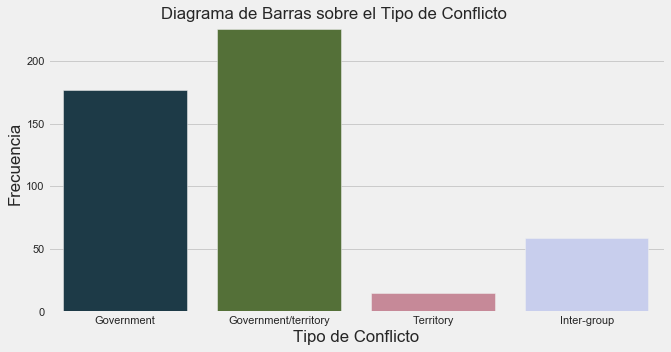

In [239]:
#Conflict Type
g3=sns.catplot(x="Contp", kind="count", palette="cubehelix", data=df, size=5)
g3.set_axis_labels( "Tipo de Conflicto","Frecuencia")
g3.fig.set_size_inches(10,5)
g3.fig.suptitle('Diagrama de Barras sobre el Tipo de Conflicto')

Text(0.5, 0.98, 'Diagrama de Barras sobre la Region')

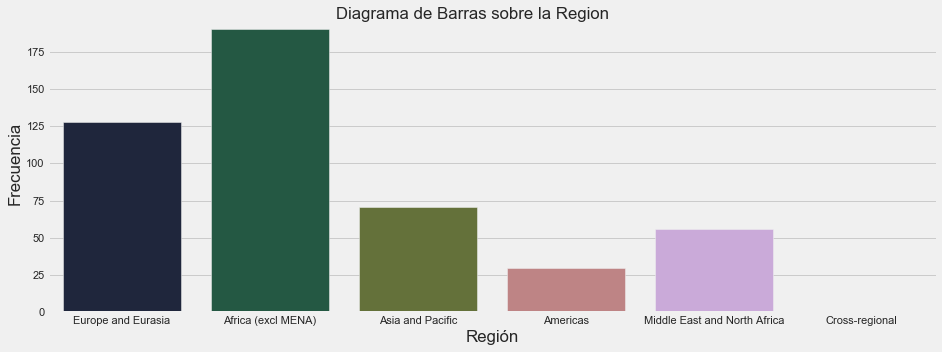

In [238]:
#Region
g3=sns.catplot(x="Reg", kind="count", palette="cubehelix", data=df, size=5)
g3.set_axis_labels( "Región","Frecuencia")
g3.fig.set_size_inches(15,5)
g3.fig.suptitle('Diagrama de Barras sobre la Region')

Text(0.5, 0.98, 'Diagrama de barras sobre el Año')

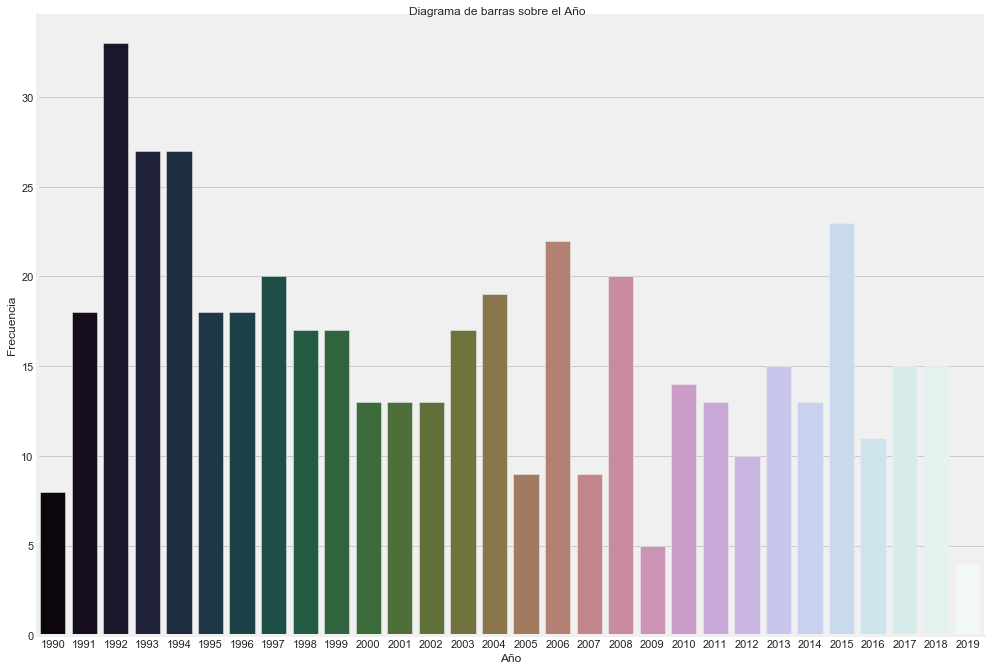

In [8]:
#Año
df["Year"]=[df["Dat"][i][0:4] for i in range(len(df["Dat"]))]
number=[pd.value_counts(df['Year'])[i] for i in range(len(df["Year"].unique()))]


g3=sns.catplot(x="Year", kind="count", palette="cubehelix", data=df, size=5)
g3.set_axis_labels( "Año","Frecuencia")
g3.fig.set_size_inches(15,10)
g3.fig.suptitle('Diagrama de barras sobre el Año')

Text(0.5, 0.98, 'Tipo de acuerdo')

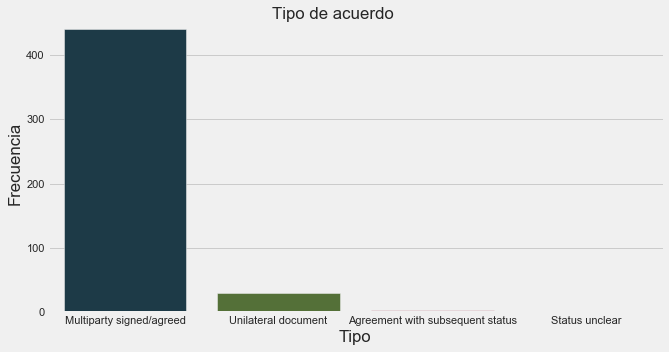

In [247]:
#Tipo de acuerdo
g3=sns.catplot(x="Status", kind="count", palette="cubehelix", data=df, size=5)
g3.set_axis_labels( "Tipo","Frecuencia")
g3.fig.set_size_inches(10,5)
g3.fig.suptitle('Tipo de acuerdo')

Text(0.5, 0.98, 'Tipo de conflicto entre regiones')

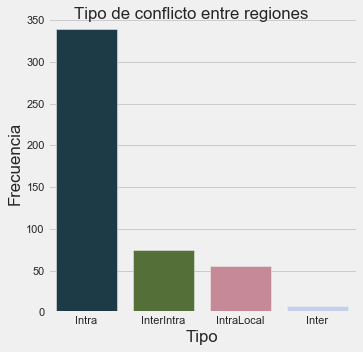

In [248]:
#Tipo de conflicto entre regiones
g3=sns.catplot(x="Agtp", kind="count", palette="cubehelix", data=df, size=5)
g3.set_axis_labels( "Tipo","Frecuencia")
g3.fig.set_size_inches(5,5)
g3.fig.suptitle('Tipo de conflicto entre regiones')


Text(0.5, 0.98, 'Estado del acuerdo')

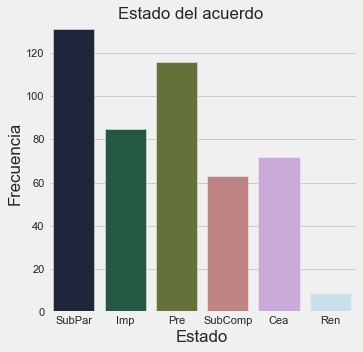

In [249]:
#Estado
g3=sns.catplot(x="Stage", kind="count", palette="cubehelix", data=df, size=5)
g3.set_axis_labels("Estado","Frecuencia")
g3.fig.set_size_inches(5,5)
g3.fig.suptitle('Estado del acuerdo')

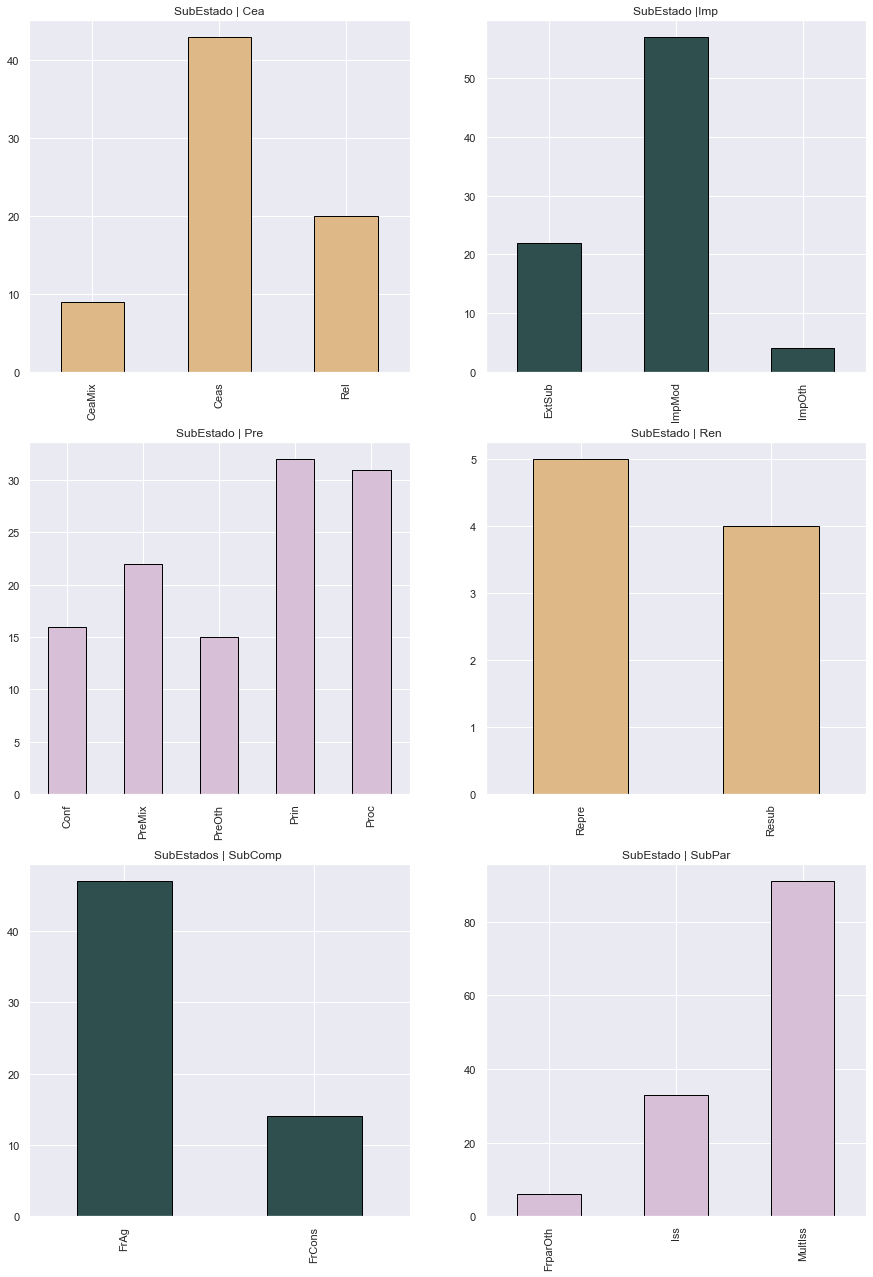

In [124]:
#StageSub
plt.figure(figsize=(15,22))

plt.subplot(3,2,1)
plot = df["StageSub"][df["Stage"]=="Cea"].value_counts().sort_index().plot(kind='bar',
                                            title='SubEstado | Cea',color = "burlywood", ec="black")

plt.subplot(3,2,2)
plot = df["StageSub"][df["Stage"]=="Imp"].value_counts().sort_index().plot(kind='bar',
                                             title='SubEstado |Imp',color = "darkslategrey", ec="black")

plt.subplot(3,2,3)
plot = df["StageSub"][df["Stage"]=="Pre"].value_counts().sort_index().plot(kind='bar',
                                             title='SubEstado | Pre',color = "thistle", ec="black")

plt.subplot(3,2,4)
plot = df["StageSub"][df["Stage"]=="Ren"].value_counts().sort_index().plot(kind='bar',
                                             title='SubEstado | Ren',color = "burlywood", ec="black")

plt.subplot(3,2,5)
plot = df["StageSub"][df["Stage"]=="SubComp"].value_counts().sort_index().plot(kind='bar',
                                             title='SubEstados | SubComp ',color = "darkslategrey", ec="black")

plt.subplot(3,2,6)
plot = df["StageSub"][df["Stage"]=="SubPar"].value_counts().sort_index().plot(kind='bar',
                                             title='SubEstado | SubPar',color = "thistle", ec="black")


#### 2.1.  Variables numéricas

In [4]:
Numerical=[]
for i in df.columns:
    if df[i].dtypes=="int64" or df[i].dtypes=="float64" :
        Numerical.append(i)

Numerical

SumNumerical=[]
SumNumerical1=[]
for i in df.columns:
    if df[i].dtypes=="int64" and df[i].sum()>300 :
        SumNumerical.append(i)
        SumNumerical1.append(df[i].sum())
print(SumNumerical,SumNumerical1)


['PP', 'AgtId', 'Lgt', 'N_characters', 'GCh', 'GRa', 'GRef', 'HrFra', 'Med', 'Dev', 'Ce', 'SsrPol', 'SsrDdr', 'ImSrc'] [37779, 467897, 6324, 11806059, 328, 391, 798, 370, 386, 525, 525, 318, 384, 476]


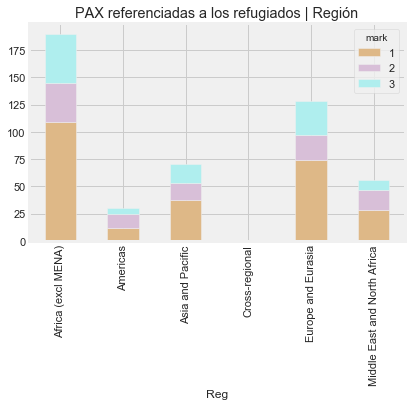

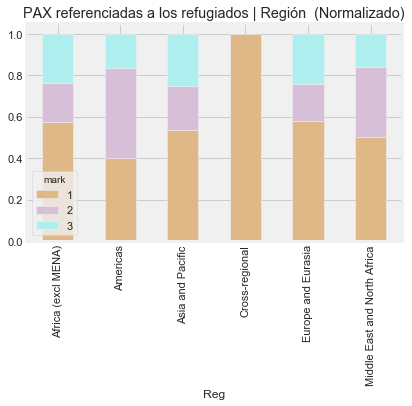

In [96]:
#PAX referenciadas a los refugiados

ct = pd.crosstab(df['Reg'], df['GRef'])
g=ct.plot.bar(stacked=True, color=["burlywood", "thistle","paleturquoise"])
plt.title('PAX referenciadas a los refugiados | Región')
plt.legend(title='mark')

ct = pd.crosstab(df['Reg'], df['GRef'], normalize='index')
g=ct.plot.bar(stacked=True, color=["burlywood", "thistle","paleturquoise"])
plt.title('PAX referenciadas a los refugiados | Región  (Normalizado)')
plt.legend(title='mark')

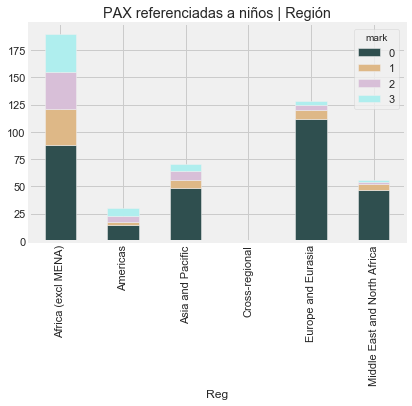

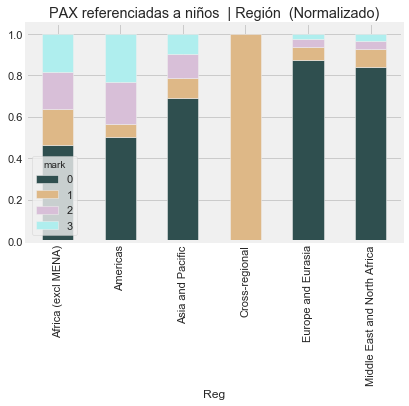

In [91]:
#PAX referenciadas a niños

ct = pd.crosstab(df['Reg'], df['GCh'])
g=ct.plot.bar(stacked=True, color=["darkslategrey","burlywood", "thistle","paleturquoise"])
plt.title('PAX referenciadas a niños | Región')
plt.legend(title='mark')

ct = pd.crosstab(df['Reg'], df['GCh'], normalize='index')
g=ct.plot.bar(stacked=True, color=["darkslategrey","burlywood", "thistle","paleturquoise"])
plt.title('PAX referenciadas a niños  | Región  (Normalizado)')
plt.legend(title='mark')

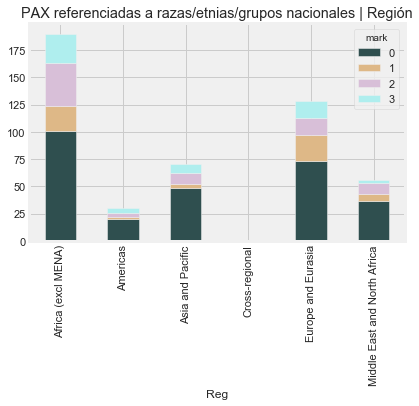

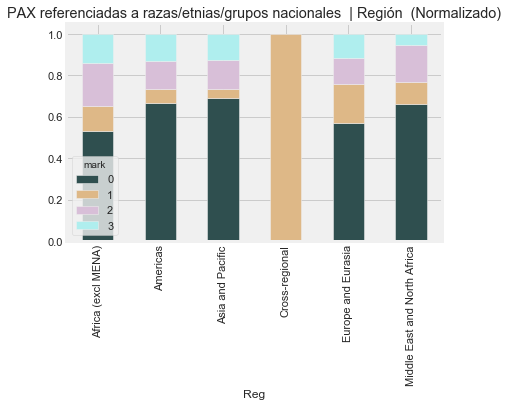

In [70]:
#PAX referenciadas a raxas

ct = pd.crosstab(df['Reg'], df['GRa'])
g=ct.plot.bar(stacked=True, color=["darkslategrey","burlywood", "thistle","paleturquoise"])
plt.title('PAX referenciadas a razas/etnias/grupos nacionales | Región')
plt.legend(title='mark')

ct = pd.crosstab(df['Reg'], df['GRa'], normalize='index')
g=ct.plot.bar(stacked=True, color=["darkslategrey","burlywood", "thistle","paleturquoise"])
plt.title('PAX referenciadas a razas/etnias/grupos nacionales  | Región  (Normalizado)')
plt.legend(title='mark')

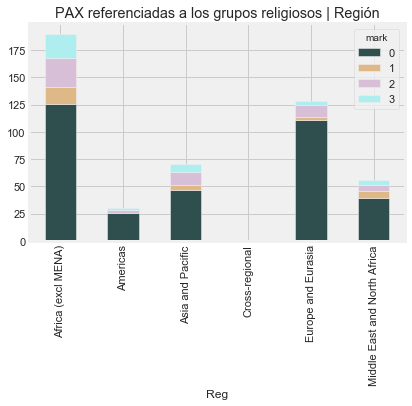

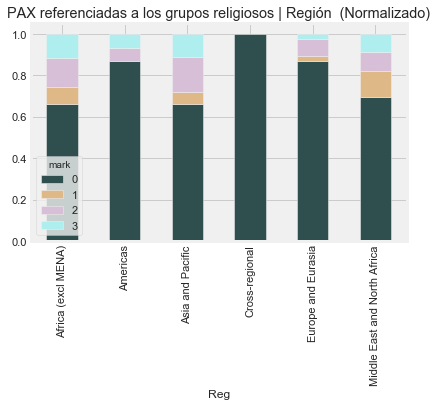

In [63]:
#PAX referenciadas a los religiosos

ct = pd.crosstab(df['Reg'], df['GRe'])
g=ct.plot.bar(stacked=True, color=["darkslategrey","burlywood", "thistle","paleturquoise"])
plt.title('PAX referenciadas a los grupos religiosos | Región')
plt.legend(title='mark')

ct = pd.crosstab(df['Reg'], df['GRe'], normalize='index')
g=ct.plot.bar(stacked=True, color=["darkslategrey","burlywood", "thistle","paleturquoise"])
plt.title('PAX referenciadas a los grupos religiosos | Región  (Normalizado)')
plt.legend(title='mark')

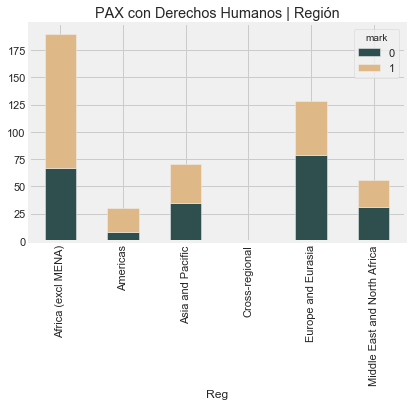

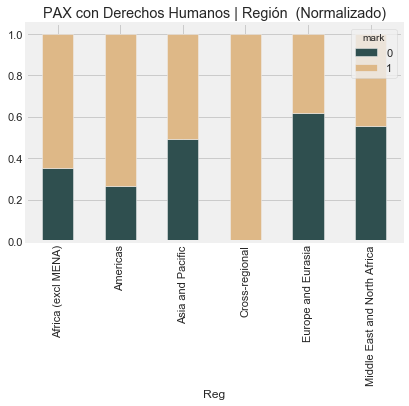

In [59]:
#PAX con Derechos Humanos

ct = pd.crosstab(df['Reg'], df['HrGen'])
g=ct.plot.bar(stacked=True, color=["darkslategrey","burlywood"])
plt.title('PAX con Derechos Humanos | Región')
plt.legend(title='mark')

ct = pd.crosstab(df['Reg'], df['HrGen'], normalize='index')
g=ct.plot.bar(stacked=True, color=["darkslategrey","burlywood"])
plt.title('PAX con Derechos Humanos | Región  (Normalizado)')
plt.legend(title='mark')

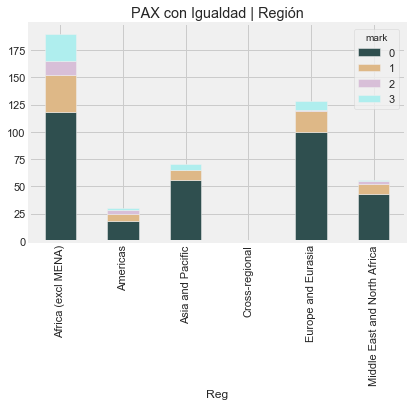

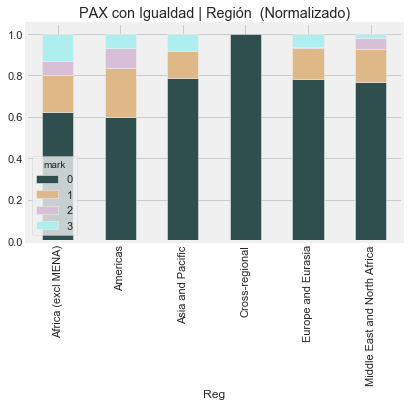

In [58]:
#PAX con Igualdad

ct = pd.crosstab(df['Reg'], df['EqGen'])
g=ct.plot.bar(stacked=True, color=["darkslategrey","burlywood", "thistle","paleturquoise"])
plt.title('PAX con Igualdad | Región')
plt.legend(title='mark')

ct = pd.crosstab(df['Reg'], df['EqGen'], normalize='index')
g=ct.plot.bar(stacked=True, color=["darkslategrey","burlywood", "thistle","paleturquoise"])
plt.title('PAX con Igualdad | Región  (Normalizado)')
plt.legend(title='mark')


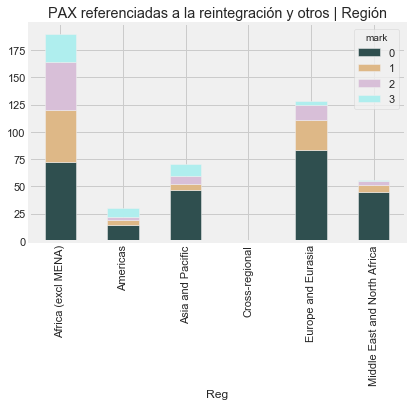

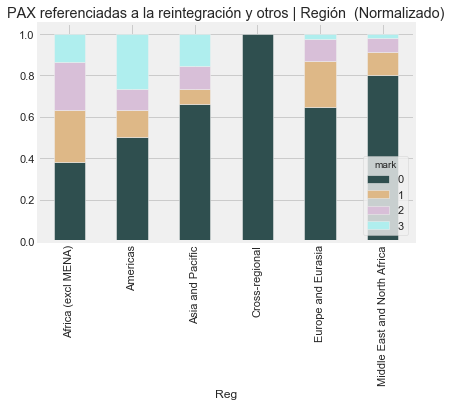

In [71]:
#PAX referenciadas a la reintegracion

ct = pd.crosstab(df['Reg'], df['SsrDdr'])
g=ct.plot.bar(stacked=True, color=["darkslategrey","burlywood", "thistle","paleturquoise"])
plt.title('PAX referenciadas a la reintegración y otros | Región')
plt.legend(title='mark')

ct = pd.crosstab(df['Reg'], df['SsrDdr'], normalize='index')
g=ct.plot.bar(stacked=True, color=["darkslategrey","burlywood", "thistle","paleturquoise"])
plt.title('PAX referenciadas a la reintegración y otros | Región  (Normalizado)')
plt.legend(title='mark')

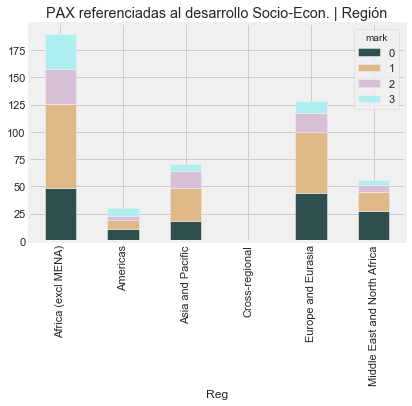

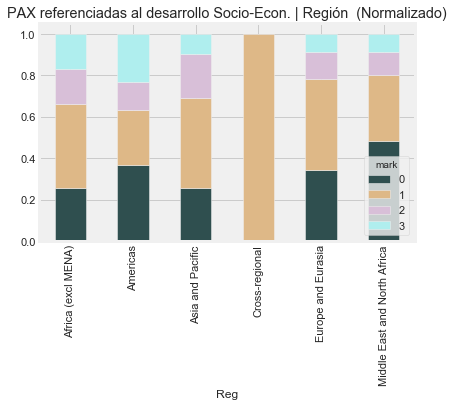

In [5]:
#PAX referenciadas al desarrollo

ct = pd.crosstab(df['Reg'], df['Dev'])
g=ct.plot.bar(stacked=True, color=["darkslategrey","burlywood", "thistle","paleturquoise"])
plt.title('PAX referenciadas al desarrollo Socio-Econ. | Región')
plt.legend(title='mark')

ct = pd.crosstab(df['Reg'], df['Dev'], normalize='index')
g=ct.plot.bar(stacked=True, color=["darkslategrey","burlywood", "thistle","paleturquoise"])
plt.title('PAX referenciadas al desarrollo Socio-Econ. | Región  (Normalizado)')
plt.legend(title='mark')

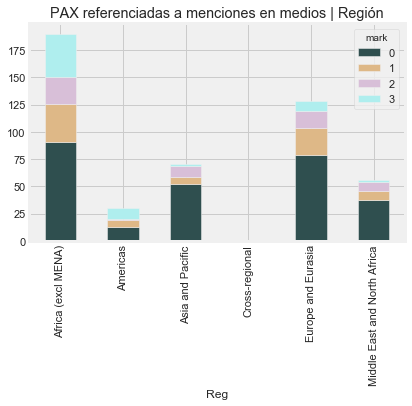

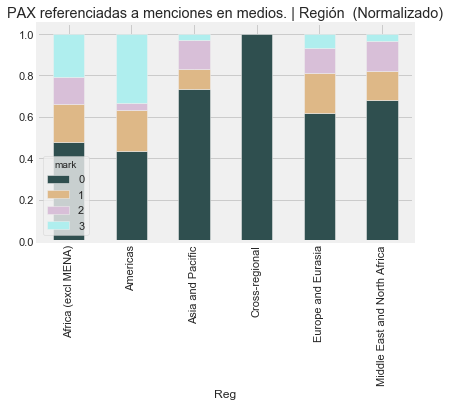

In [68]:
#PAX referenciadas a medios

ct = pd.crosstab(df['Reg'], df['Med'])
g=ct.plot.bar(stacked=True, color=["darkslategrey","burlywood", "thistle","paleturquoise"])
plt.title('PAX referenciadas a menciones en medios | Región')
plt.legend(title='mark')

ct = pd.crosstab(df['Reg'], df['Med'], normalize='index')
g=ct.plot.bar(stacked=True, color=["darkslategrey","burlywood", "thistle","paleturquoise"])
plt.title('PAX referenciadas a menciones en medios. | Región  (Normalizado)')
plt.legend(title='mark')

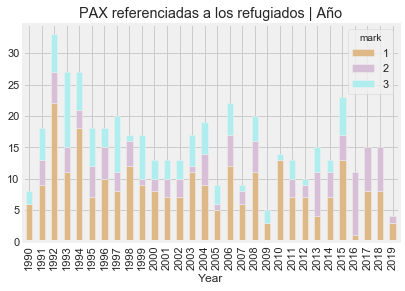

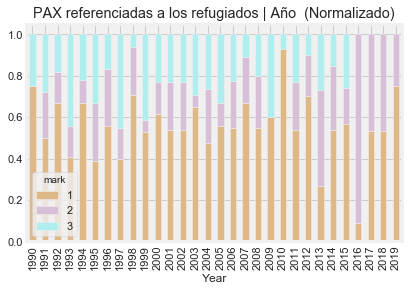

In [82]:
#PAX referenciadas a los refugiados vs año

ct = pd.crosstab(df['Year'], df['GRef'])
g=ct.plot.bar(stacked=True, color=["burlywood", "thistle","paleturquoise"])
plt.title('PAX referenciadas a los refugiados | Año')
plt.legend(title='mark')

ct = pd.crosstab(df['Year'], df['GRef'], normalize='index')
g=ct.plot.bar(stacked=True, color=["burlywood", "thistle","paleturquoise"])
plt.title('PAX referenciadas a los refugiados | Año  (Normalizado)')
plt.legend(title='mark')

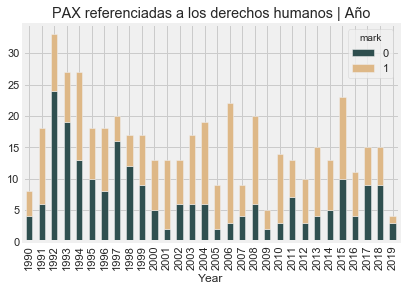

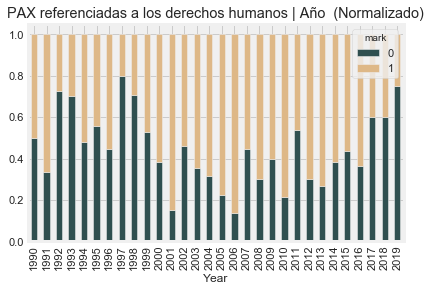

In [9]:
#PAX referenciadas a los refugiados vs HR

ct = pd.crosstab(df['Year'], df['HrGen'])
g=ct.plot.bar(stacked=True, color=["darkslategrey", "burlywood", "thistle","paleturquoise"])
plt.title('PAX referenciadas a los derechos humanos | Año')
plt.legend(title='mark')

ct = pd.crosstab(df['Year'], df['HrGen'], normalize='index')
g=ct.plot.bar(stacked=True, color=["darkslategrey", "burlywood", "thistle","paleturquoise"])
plt.title('PAX referenciadas a los derechos humanos | Año  (Normalizado)')
plt.legend(title='mark')

Text(0.5, 1.0, 'GRef | SsrDdr')

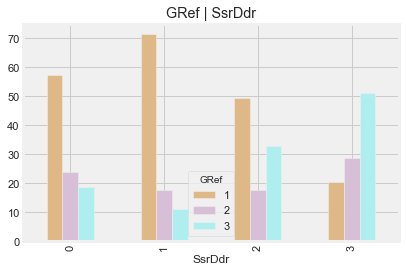

In [13]:
#Gref SSRDDR

plot = pd.crosstab(index=df["SsrDdr"],
            columns=df["GRef"]).apply(lambda r: r/r.sum() *100,
                                       axis=1).plot(kind='bar', color=["burlywood", "thistle","paleturquoise"])
plt.title('GRef | SsrDdr')

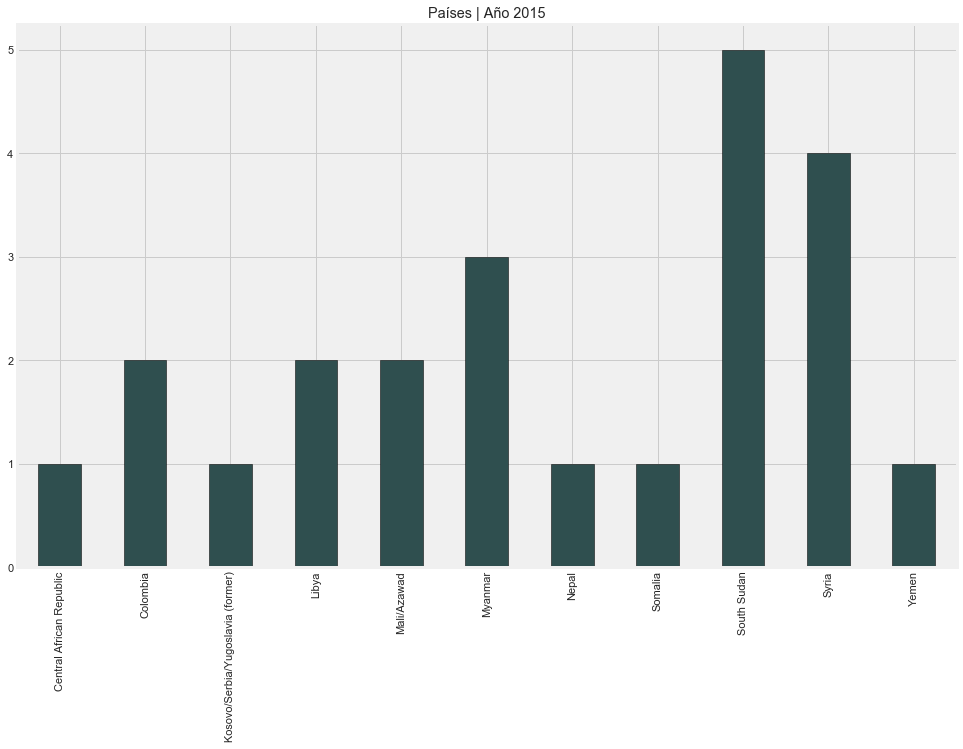

In [81]:
#Paises 1992

plt.figure(figsize=(15,10))

plot = df["Con"][df["Year"]=="1992"].value_counts().sort_index().plot(kind='bar',
                                            title='Países | Año 1992',color = "darkslategrey", ec="black")


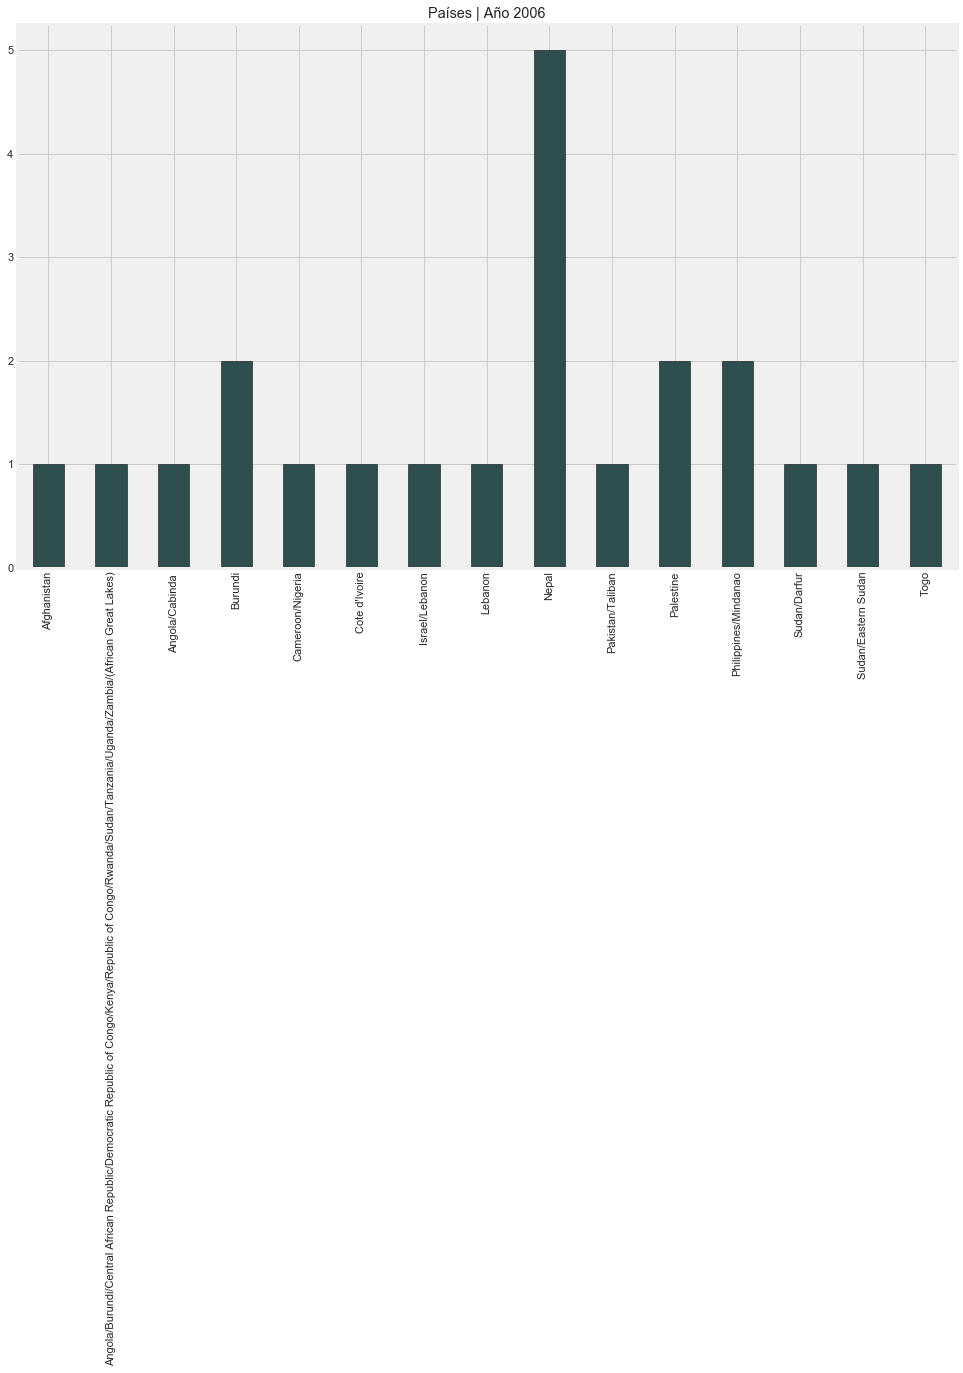

In [11]:
#Paises 2006

plt.figure(figsize=(15,10))

plot = df["Con"][df["Year"]=="2006"].value_counts().sort_index().plot(kind='bar',
                                            title='Países | Año 2006',color = "darkslategrey", ec="black")

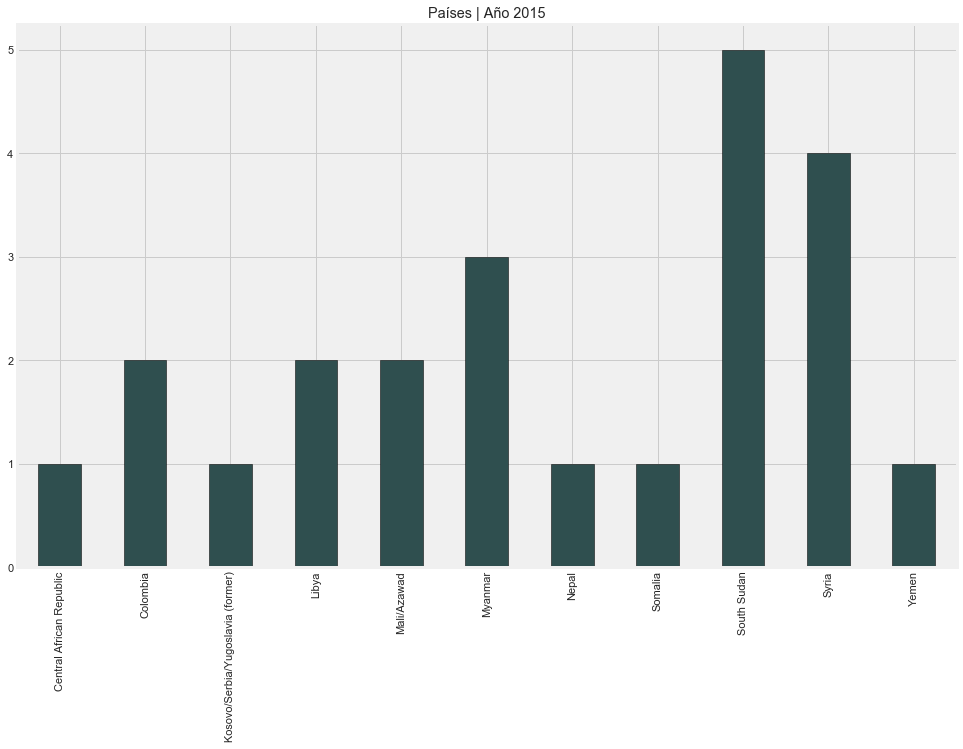

In [12]:
#Paises 2015

plt.figure(figsize=(15,10))

plot = df["Con"][df["Year"]=="2015"].value_counts().sort_index().plot(kind='bar',
                                            title='Países | Año 2015',color = "darkslategrey", ec="black")